---------------------------------------------------------

<font size=6 color='#13DAE2'>
Sebastian Carillo Mejía - 1001414595

Support Vector Machine
</font>

---------------------------------------------------------

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

from sklearn.preprocessing import  StandardScaler

from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#@title Some important functions to use later on

# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax,clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


Tarea 11.1
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

------------------------------------------------------

<font size=5 color='#13DAE2'>
SVM para Make_moons
</font>

------------------------------------------------------

Generamos los datos

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X1, y1 = make_moons(n_samples=300, noise=0.15, shuffle=True,  random_state=1)

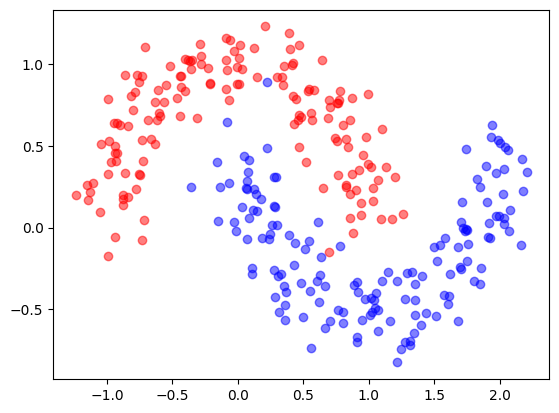

In [ ]:
plt.plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5);
plt.plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5);

Separamos los datos de entrenamiento y testeo aleatoriamente y estandarizamos los valores numéricos



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ahora, definimos el modelo y los parámetros que probaremos utilizando grid search cv

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}

# Definimos el modelo
classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')

# Alimentamos el modelo
classifier.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

Revisamos el comportamiento de los diferentes modelos bajo los diferentes parámetros del grid.

Best estimator: SVC(C=10)
Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9875


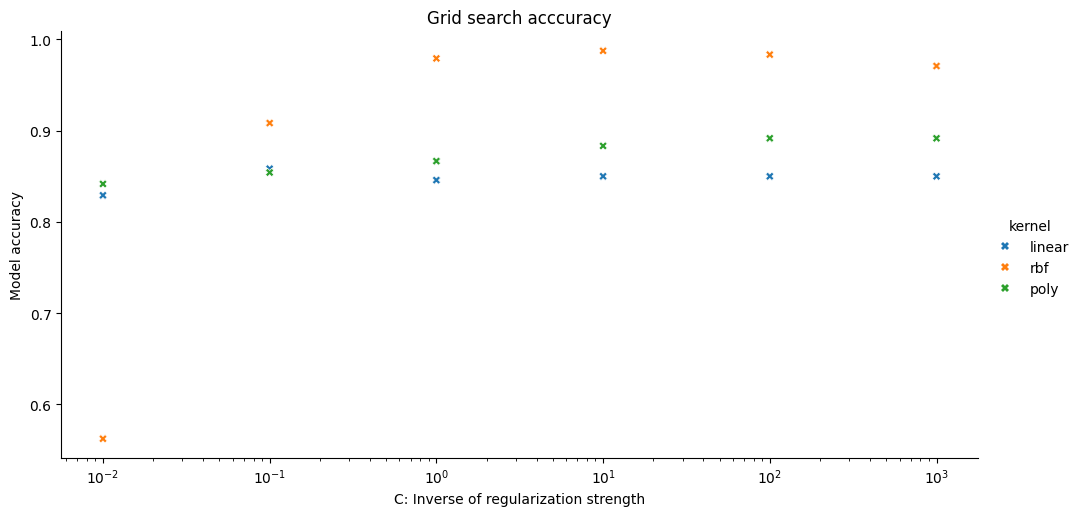

In [ ]:
#Grid search plots and print
mean_scores = classifier.cv_results_['mean_test_score']
std_scores = classifier.cv_results_['std_test_score']
kernel = classifier.cv_results_['param_kernel']
c = classifier.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier.best_estimator_))
print('Parameters: ' + str(classifier.best_params_))
print('Accuracy: ' + str(classifier.best_score_))

Ahora que conocemos los mejores parámetros, creamos nuestro modelo

In [ ]:
# Create and train the model
modelMoon = SVC(kernel='rbf', C=10)
modelMoon.fit(X_train_scaled,y_train)

# Evaluate the model
y_predict = modelMoon.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60




<font size=5 color='#13DAE2'>
2. Contorno de frontera de decisión
</font>

Training score:0.990


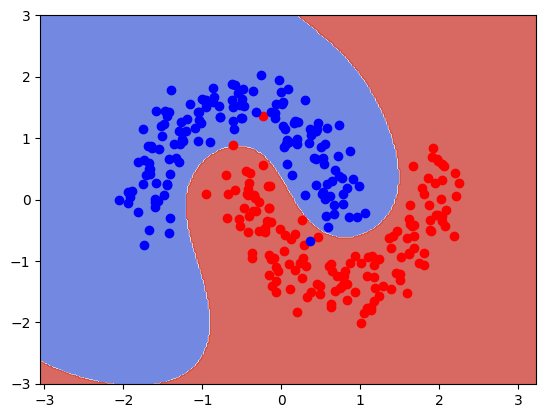

In [ ]:
#Countour plot

X1 = scaler.transform(X1)


fig, ax = plt.subplots()
X0, X01 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X01)
plot_contours(ax, modelMoon, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)



plt.plot(X1[:,0][y1==1],X1[:,1][y1==1],"ro", alpha=1);
plt.plot(X1[:,0][y1==0],X1[:,1][y1==0],"bo", alpha=1);
print(f"Training score:{modelMoon.score(X1, y1):.3f}")


<font size=5 color='#13DAE2'>
3. Matriz de confusión para mostar los resultados
</font>

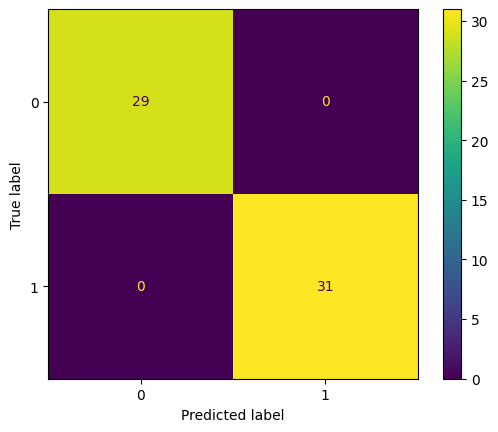

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

------------------------------------------------------

<font size=5 color='#13DAE2'>
SVM para Make_bloobs
</font>

------------------------------------------------------

In [ ]:
from sklearn.datasets import make_blobs

We first generate the points

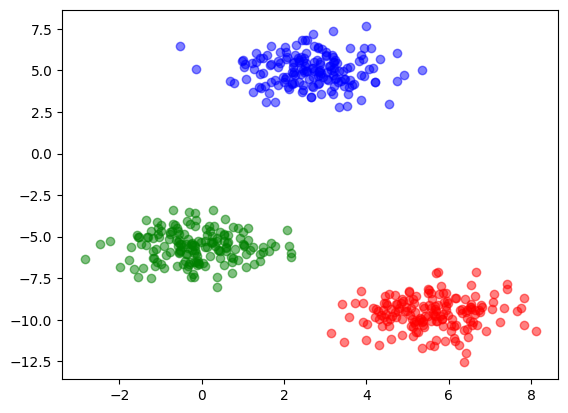

In [ ]:
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True,
                    random_state=10)

plt.plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5);
plt.plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5);
plt.plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5);


We separate the train and test data, then standarize numerical values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we apply the grid search cv to find the best prams combination

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}

# Definimos el modelo
classifier_3 = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')

# Alimentamos el modelo
classifier_3.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy')

Check the beahior of the possible combinations

Best estimator: SVC(C=0.01, kernel='linear')
Parameters: {'C': 0.01, 'kernel': 'linear'}
Accuracy: 1.0


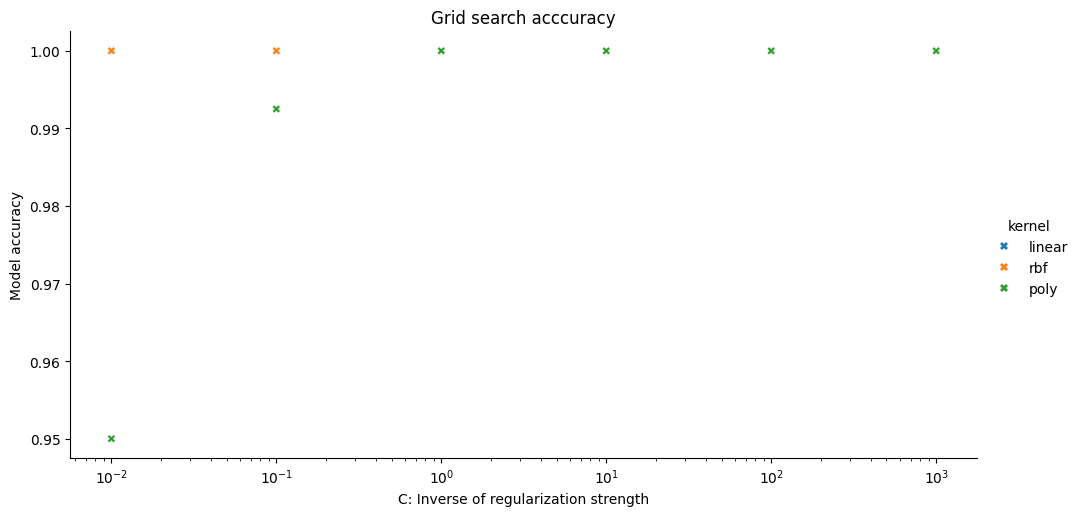

In [ ]:
#Grid search plots and print
mean_scores = classifier_3.cv_results_['mean_test_score']
std_scores = classifier_3.cv_results_['std_test_score']
kernel = classifier_3.cv_results_['param_kernel']
c = classifier_3.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier_3.best_estimator_))
print('Parameters: ' + str(classifier_3.best_params_))
print('Accuracy: ' + str(classifier_3.best_score_))

Now, we can create the model with the best params and show the classification report

In [ ]:
# Create and train the model
modelBloobs = SVC(kernel='linear', C=0.01)
modelBloobs.fit(X_train_scaled,y_train)

# Evaluate the model
y_predict = modelBloobs.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100




<font size=5 color='#13DAE2'>
2. Contorno de frontera de decisión
</font>

Training score:1.000


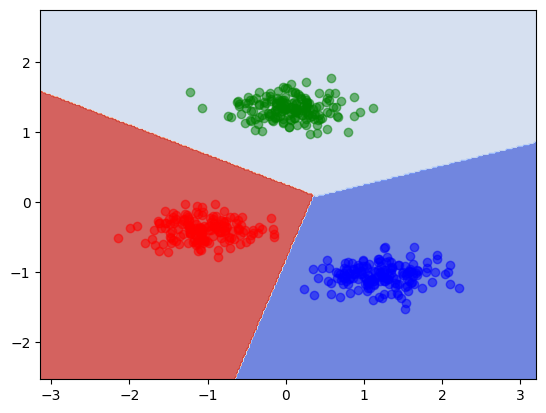

In [ ]:
#Countour plot

X3 = scaler.transform(X3)


fig, ax = plt.subplots()
X0, X03 = X3[:, 0], X3[:, 1]
xx, yy = make_meshgrid(X0, X03)
plot_contours(ax, modelBloobs, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)



plt.plot(X3[:,0][y3==0],X3[:,1][y3==0],"bo", alpha=0.5);
plt.plot(X3[:,0][y3==1],X3[:,1][y3==1],"go", alpha=0.5);
plt.plot(X3[:,0][y3==2],X3[:,1][y3==2],"ro", alpha=0.5);

print(f"Training score:{modelBloobs.score(X3, y3):.3f}")

<font size=5 color='#13DAE2'>
3. Matriz de confusión para mostar los resultados
</font>

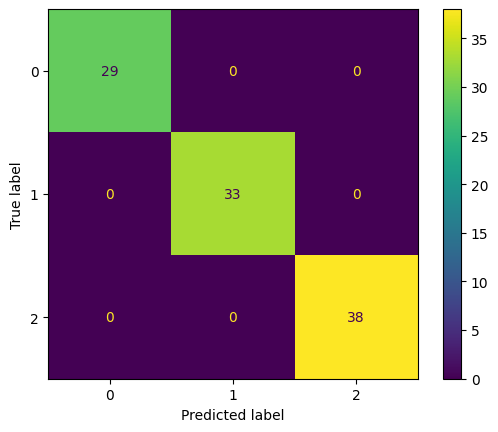

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

------------------------------------------------------

<font size=5 color='#13DAE2'>
SVM para Make_circles
</font>

------------------------------------------------------


Import data

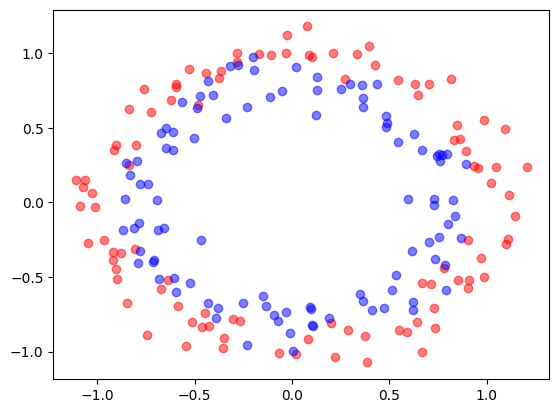

In [ ]:
X, y = make_circles(n_samples=200, noise=0.1, shuffle=True,  random_state=1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"ro", alpha=0.5);
plt.plot(X[:,0][y==1],X[:,1][y==1],"bo", alpha=0.5);

Divide the train and test data, then standarize their values

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1080)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply the grid search method

Best estimator: SVC(C=10)
Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.8875


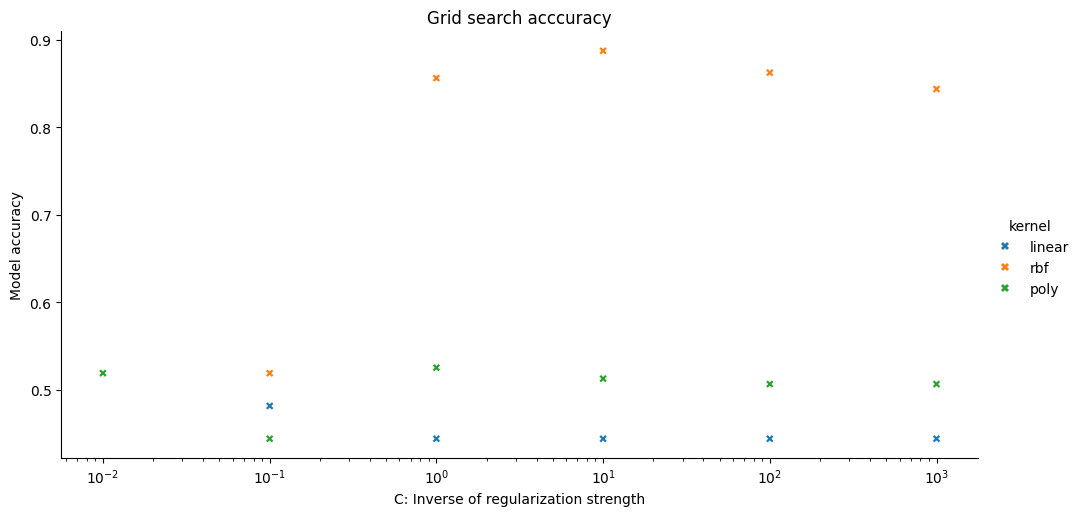

In [ ]:
#Grid search
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}


classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

#Grid search plots and print
mean_scores = classifier.cv_results_['mean_test_score']
std_scores = classifier.cv_results_['std_test_score']
kernel = classifier.cv_results_['param_kernel']
c = classifier.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier.best_estimator_))
print('Parameters: ' + str(classifier.best_params_))
print('Accuracy: ' + str(classifier.best_score_))

Ahora que conocemos el mejor mode, lo creamos

In [ ]:
# Create and train the model
modelCircles = SVC(kernel='rbf', C=10)
modelCircles.fit(X_train_scaled,y_train)

# Evaluate the model
y_predict = modelCircles.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70        17
           1       0.82      0.61      0.70        23

    accuracy                           0.70        40
   macro avg       0.72      0.72      0.70        40
weighted avg       0.73      0.70      0.70        40



<font size=5 color='#13DAE2'>
2. Contorno de frontera de decisión
</font>

Training error:0.865


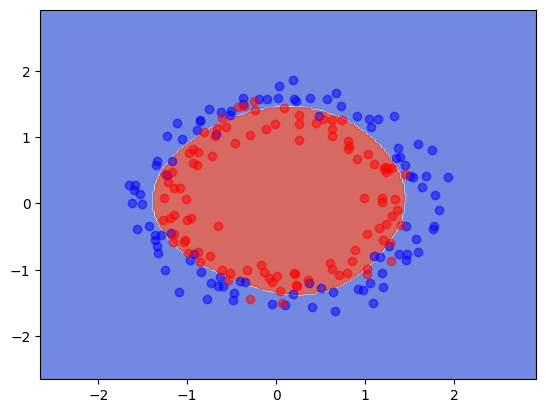

In [ ]:
X = scaler.transform(X)

#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X)
plot_contours(ax, modelCircles, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bo", alpha=0.5);
plt.plot(X[:,0][y==1],X[:,1][y==1],"ro", alpha=0.5);

print(f"Training error:{modelCircles.score(X, y):.3f}")

<font size=5 color='#13DAE2'>
3. Matriz de confusión para mostar los resultados
</font>

NOw that we have found the best params combination, we can procees to create the model

              precision    recall  f1-score   support

           0       0.61      0.82      0.70        17
           1       0.82      0.61      0.70        23

    accuracy                           0.70        40
   macro avg       0.72      0.72      0.70        40
weighted avg       0.73      0.70      0.70        40



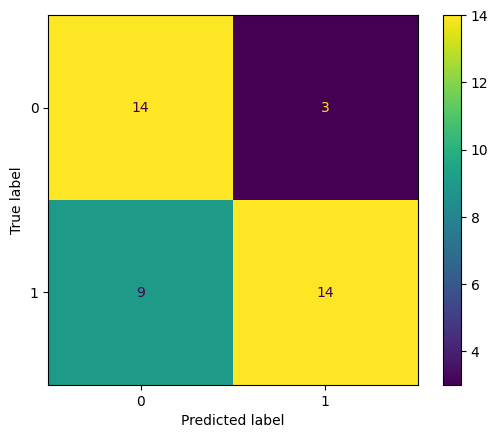

In [ ]:

# Confusion matrix
y_predict = modelCircles.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()